In [1]:
# SELECT subreddit, score, body, gilded
# FROM `fh-bigquery.reddit_comments.2019*`
# WHERE subreddit = 'vegan' AND (gilded > 1 OR score > 50) 

In [1]:
%matplotlib inline
import os
import re

import pandas as pd
import matplotlib.pyplot as plt
import spacy

from collections import Counter

from imageio import imread
from wordcloud import WordCloud


limit = 1000
mask = imread('broccoli2.png')
re_non_word = re.compile(r'[\W\s]')

nlp = spacy.load('en_core_web_sm')

for word in nlp.Defaults.stop_words:
    nlp.vocab[word].is_stop = True

df = pd.read_csv(os.path.expanduser('abc.csv'))
num_comments = len(df.body)


In [2]:
names = []
words = []

for idx, text in df.body.items():
    doc = nlp(text)
    for token in doc:
        if token.is_stop or not len(token.text) or re.search(re_non_word, token.text):
            continue
        if token.pos_ in ('ADV', 'INTJ', 'NOUN', 'VERB'):
            words.append(token.lemma_)
        elif token.pos_ in ('ADJ', 'PRON'):
            if token.text in ('i', 'I'):
                words.append(token.text.upper())
            else:
                words.append(token.text.lower())
        elif token.pos_ == 'PROPN':
            name = token.text.upper()
            names.append(name)
            words.append(name)

In [3]:
freq = Counter(words)
wc2 = WordCloud(
    max_words=limit,
    mask=mask,
    background_color='#ffffff',
    ).fit_words(freq)


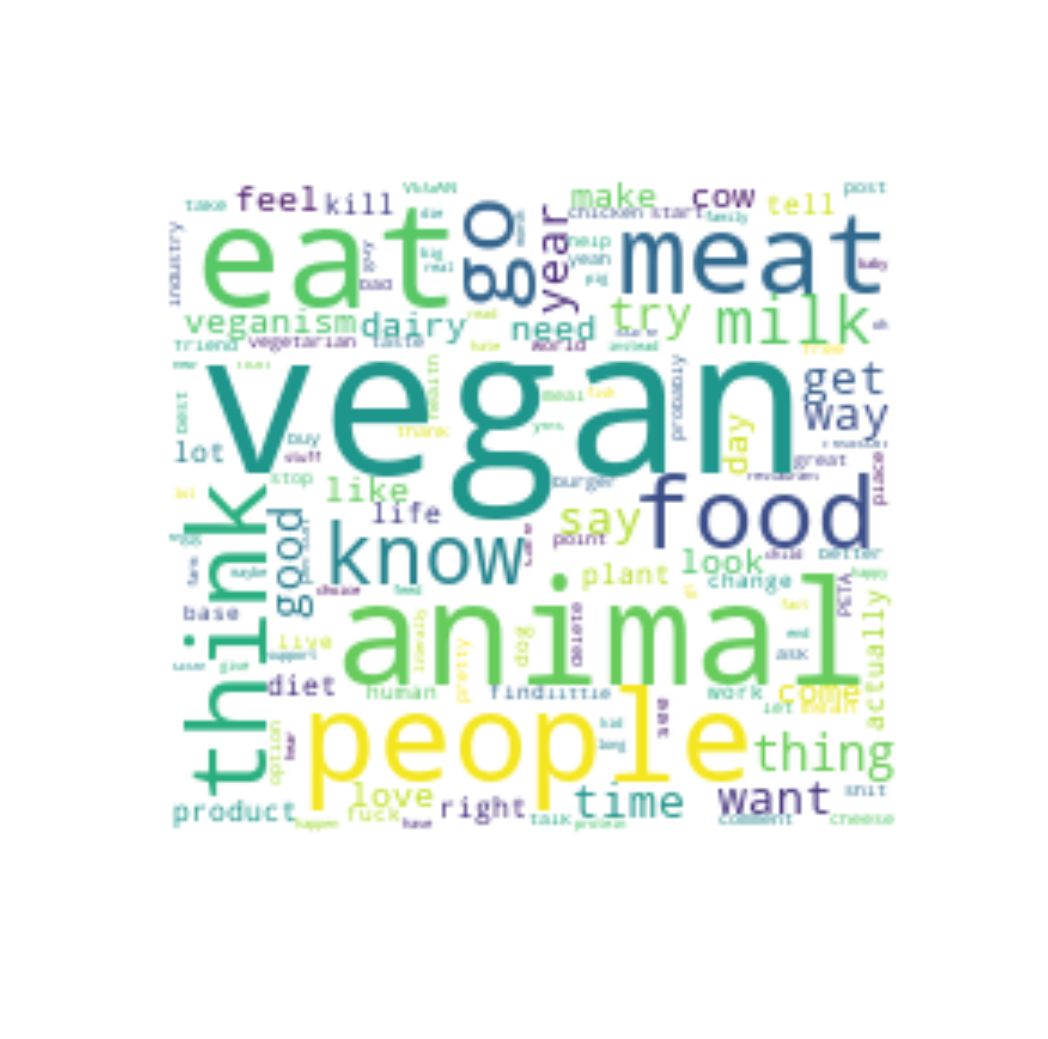

In [4]:

fig = plt.figure()
fig.set_figwidth(18)
fig.set_figheight(24)

plt.imshow(wc2, interpolation='bilinear')
#plt.annotate(annotation, xy=(0, 60), fontsize=12)
plt.axis('off')
plt.savefig('brocwc2.png', bbox_inches='tight')
plt.show()